# **Assignment 1**
## 03
___

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
import os

np.random.seed(10)
plt.style.use('ggplot')

def loadData():
        
    Root = os.getcwd().replace("\\","/")
    dataSet = dict()
    for set in ["test", "train","valid" ]:
        data= np.genfromtxt(f"{Root}/datasets/Dataset_2_{set:s}.csv", delimiter = ",")
        N         = np.shape(data)[0]
        dataSet[set] = {
            "data"      : data,
            "N"         : N,
            "X"         : np.array([[1, x[0]] for x in data]),
            "Y"         : np.array([x[1] for x in data]).reshape((N,1))
        }
    return dataSet


def w_GD(dataSet ,alpha, method, epoches):
    
    X = dataSet["X"]
    Y = dataSet["Y"]
    N = dataSet["N"]
    W            = np.array([1.5,1.5]).reshape((2,1))
    W_prev = np.array([3. ,3. ]).reshape((2,1))
    Wh         = [W_prev]
    
    for i in range(epoches):
        W_prev = W
        N = np.shape(Y)[0]

        if method == "stochastic":
            randomOrder = np.arange(N)
            np.random.shuffle( randomOrder )
            for i in randomOrder:
                W        = W - alpha * (np.matmul(X[i],W) - Y[i]) * X[i].reshape((2,1))

        elif method == "full-batch":
            grad = np.mean((np.matmul(X,W) - Y)*X, axis=0).reshape((2,1))
            W = W - alpha * grad

        else:
            print("method is wrong! just 'stochastic' & 'full-batch'")
            return Wh

        Wh.append(W)
    return Wh

def costFunction(dataSet, W):
    X = dataSet["X"]
    Y = dataSet["Y"]
    N = dataSet["N"]
    
    E = (np.sum((Y-np.matmul(X,W))**2))
    return np.sqrt(2*E/N)



Minimum of RMSE for train dataset: 0.437 , Corresponds to N_epoch = 4459
Minimum of RMSE for valid dataset: 0.385 , Corresponds to N_epoch = 4459


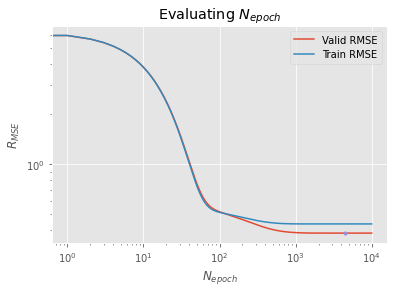

In [2]:
dataSet = loadData()
epoches = 10000
Wh = w_GD(dataSet["train"], 1e-4, "stochastic", epoches)
RMSE_train = np.zeros((epoches,1))
RMSE_valid = np.zeros((epoches,1))
for idx in range(epoches):
    RMSE_train[idx] = costFunction(dataSet["train"], Wh[idx])
    RMSE_valid[idx] = costFunction(dataSet["valid"], Wh[idx])

plt.plot(range(epoches),RMSE_valid, label = "Valid RMSE")
plt.plot(range(epoches),RMSE_train, label = "Train RMSE")
plt.legend()
plt.yscale("log")
plt.xscale("log")
plt.xlabel("$N_{epoch}$")
plt.ylabel("$R_{MSE}$")
plt.title("Evaluating $N_{epoch}$")
N_epoch = np.argmin(RMSE_valid)

print(f"Minimum of RMSE for train dataset: {RMSE_train[N_epoch][0]:.3f} , Corresponds to N_epoch = {N_epoch}")
print(f"Minimum of RMSE for valid dataset: {RMSE_valid[N_epoch][0]:.3f} , Corresponds to N_epoch = {N_epoch}")
plt.plot(N_epoch,RMSE_valid[N_epoch][0],".")

Minimum of RMSE for train dataset: 0.437, Corresponds to α = 0.004
Minimum of RMSE for valid dataset: 0.384, Corresponds to α = 0.004
Minimum of RMSE for test  dataset: 0.372, Corresponds to α = 0.004
Alpha= 0.000001 → RMSE_valid= 3.824
Alpha= 0.000004 → RMSE_valid= 1.040
Alpha= 0.000016 → RMSE_valid= 0.482
Alpha= 0.000063 → RMSE_valid= 0.396
Alpha= 0.000251 → RMSE_valid= 0.385
Alpha= 0.001000 → RMSE_valid= 0.385
Alpha= 0.003981 → RMSE_valid= 0.384
Alpha= 0.015849 → RMSE_valid= 0.386
Alpha= 0.063096 → RMSE_valid= 0.397
Alpha= 0.251189 → RMSE_valid= 0.389
Alpha= 1.000000 → RMSE_valid= 2.351


Text(0.5, 1.0, 'Evaluating α')

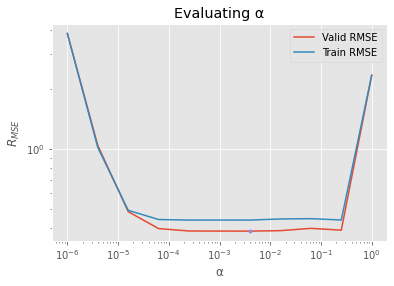

In [3]:
N_epoch = 1000
Alphas = 10**np.linspace(-6,0,11)

N_alphas = len(Alphas)
RMSE_train = np.zeros((N_alphas,1))
RMSE_valid = np.zeros((N_alphas,1))
for idx in range(N_alphas):
    Wh = w_GD(dataSet["train"], Alphas[idx], "stochastic", N_epoch)
    RMSE_train[idx] = costFunction(dataSet["train"], Wh[-1])
    RMSE_valid[idx] = costFunction(dataSet["valid"], Wh[-1])
arg = np.argmin(RMSE_valid)
alpha = Alphas[arg]
Wh = w_GD(dataSet["train"], alpha, "stochastic", N_epoch)
RMSE_test = costFunction(dataSet["test"], Wh[-1])

plt.plot(Alphas,RMSE_valid, label = "Valid RMSE")
plt.plot(Alphas,RMSE_train, label = "Train RMSE")
plt.plot(alpha,RMSE_valid[arg][0],".")


print(f"Minimum of RMSE for train dataset: {RMSE_train[arg][0]:.3f}, Corresponds to \u03B1 = {alpha:.3f}")
print(f"Minimum of RMSE for valid dataset: {RMSE_valid[arg][0]:.3f}, Corresponds to \u03B1 = {alpha:.3f}")
print(f"Minimum of RMSE for test  dataset: {RMSE_test:.3f}, Corresponds to \u03B1 = {alpha:.3f}")

print("\n".join([f"Alpha= {Alphas[i]:.6f} \u2192 RMSE_valid= {RMSE_valid[i][0]:.3f}" for i in range(N_alphas)]))

plt.xlabel("\u03B1")
plt.xscale("log")
plt.ylabel("$R_{MSE}$")
plt.yscale("log")
plt.legend()
plt.title("Evaluating \u03B1")

1000


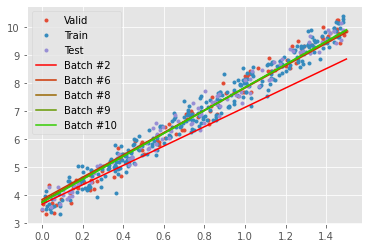

In [4]:
Wh = w_GD(dataSet["train"], alpha, "stochastic", N_epoch)
Random = np.sort(np.random.permutation(10)[0:5])

for set in ["valid", "train", "test"]:
    plt.plot([x[1] for x in dataSet[set]["X"]], dataSet[set]["Y"],".", label=set.capitalize())

print(N_epoch)
for idx, i in enumerate(Random): 
    x_ = np.linspace(0,1.5,2)
    y_ = Wh[i][0] + Wh[i][1] * x_
    plt.plot(x_, y_, "-", label = f"Batch #{i+1}",color=((1-0.2*idx,0.2*idx,0,1)))

plt.legend()
  

Minimum of RMSE for valid dataset: 0.385 , Corresponds to N_epoch = 999999


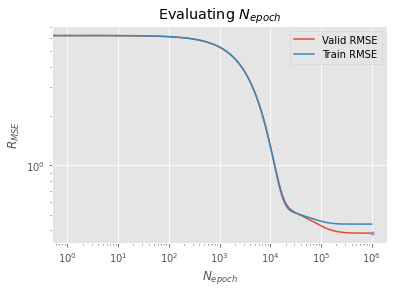

In [5]:
epoches = 1000000
Wh = w_GD(dataSet["train"], 1e-4, "full-batch", epoches)
RMSE_train = np.zeros((epoches,1))
RMSE_valid = np.zeros((epoches,1))
for idx in range(epoches):
    RMSE_train[idx] = costFunction(dataSet["train"], Wh[idx])
    RMSE_valid[idx] = costFunction(dataSet["valid"], Wh[idx])
    
N_epoch2 = np.argmin(RMSE_valid)
print(f"Minimum of RMSE for valid dataset: {RMSE_valid[N_epoch2][0]:.3f} , Corresponds to N_epoch = {N_epoch2}")
plt.plot(range(epoches),RMSE_valid, label = "Valid RMSE")
plt.plot(range(epoches),RMSE_train, label = "Train RMSE")
plt.plot(N_epoch2,RMSE_valid[N_epoch2][0],".")

plt.title("Evaluating $N_{epoch}$")
plt.xlabel("$N_{epoch}$")
plt.xscale("log")
plt.ylabel("$R_{MSE}$")
plt.yscale("log")
plt.legend()
